In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-data/health_insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/health-insurance-data/health_insurance.csv')
df.head(5)

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [4]:
df.isnull().sum()

age             0
gender          0
bmi             0
bp              0
children        0
region          0
smoker          0
medical_cost    0
dtype: int64

### **1. Univariate analysis**

<AxesSubplot:xlabel='bmi'>

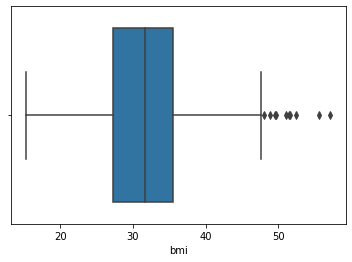

In [5]:
#1. check outliers in bmi
sns.boxplot(df.bmi)


In [6]:
data = sorted(df['bmi'])

In [7]:
q1, q3 = np.percentile(data, [25,75])
print(q1,q3)

27.2075 35.488749999999996


In [8]:
IQR = q3-q1
IQR

8.281249999999996

In [9]:
l_f = q1 - (1.5*IQR)
u_f = q3 + (1.5*IQR)

In [10]:
print(l_f,u_f)

14.785625000000005 47.91062499999999


In [11]:
print(np.where(df.bmi>47.91062499999999))

(array([ 248,  363,  509,  809,  822,  857,  892, 1009, 1093, 1279]),)


* the outliers can be ignored here

0.04359793424360781

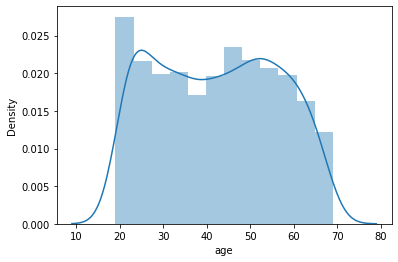

In [12]:
sns.distplot(df.age)
df.age.skew()

age has two peaks and data slightly skewed to left

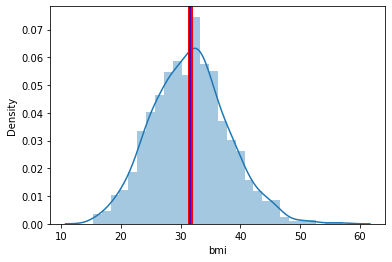

In [13]:
sns.distplot(df.bmi)
plt.axvline(df.bmi.mean(),color = 'r',lw=5)
plt.axvline(df.bmi.median(),color = 'b')

mean and median are almost equal , bmi is normally distributed

<AxesSubplot:xlabel='medical_cost'>

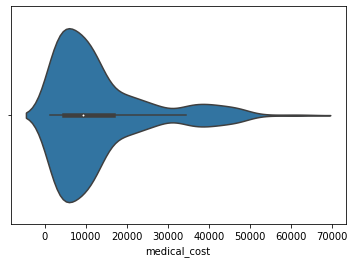

In [14]:
sns.violinplot(df.medical_cost)

### **2.) Multivariate Analysis**

1). Is there any individual with age less than 30 and medical cost greater than 40k?

In [15]:
df[(df.age<30)&(df.medical_cost>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


2). Does the scatter plot of BMI and medical cost reveal potential outliers?

<AxesSubplot:xlabel='bmi', ylabel='medical_cost'>

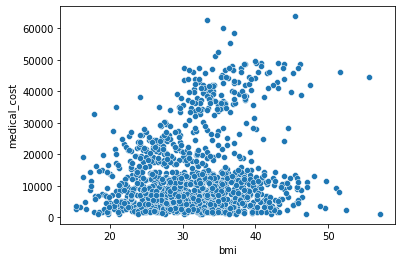

In [16]:
sns.scatterplot(df.bmi,df.medical_cost)

there are potential outliers above 50k

3). Determine the percentage variation in BMI for males and females?

In [17]:
x=df.groupby(['gender'])['bmi'].sum()
print(x)

gender
F    20909.675
M    20146.140
Name: bmi, dtype: float64


4). Which region has the highest number of males?

In [18]:
df.groupby(['region'],['gender']=='M').max()

,age,gender,bmi,bp,children,smoker,medical_cost
region,,,,,,,
northeast,68,M,55.58,165,5,smoker,60021.39897
northwest,68,M,57.13,165,5,smoker,63770.42801
southeast,69,M,51.60,178,5,smoker,62592.87309
southwest,69,M,51.52,168,5,smoker,52590.82939


5). Analyze the pairwise relationship between the numeric variables?

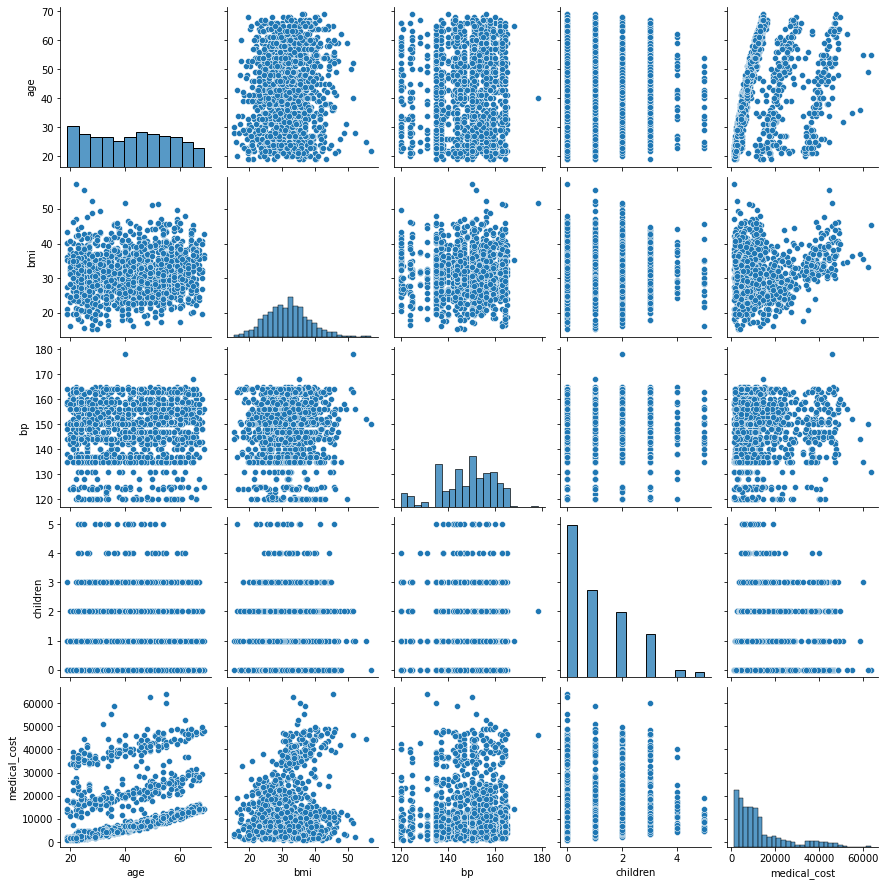

In [19]:
df_num = df.select_dtypes(np.number)
sns.pairplot(df_num, palette = 'viridis')

6. Are the medical costs affected by an individual’s smoking habits?

In [20]:
df.groupby(['smoker'])['medical_cost'].max()

smoker
non-smoker    36910.60803
smoker        63770.42801
Name: medical_cost, dtype: float64

7. Check if the region of residence and age of the individuals have an impact on the medical cost?

<AxesSubplot:xlabel='age', ylabel='medical_cost'>

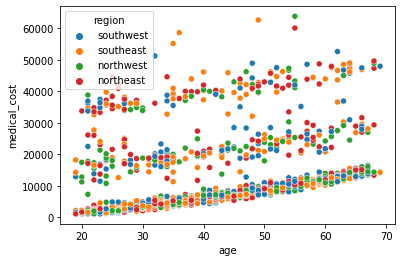

In [21]:
sns.scatterplot(df.age,df.medical_cost, hue = df.region)

### 3. Handle Non-Numeric Data.

1). Create a dummy variable for each category in ‘region’?

In [22]:
df_region = pd.get_dummies(df.region,drop_first = True)
df_region

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1295,0,0,1
1296,0,0,0
1297,0,1,0
1298,1,0,0


2. Create a variable ‘smoker_label’ containing unique label for each category in the variable ‘smoker’?

In [23]:
import scipy as stats
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le = LabelEncoder()
ss = StandardScaler()
ms = MinMaxScaler()
df['smoker'] = le.fit_transform(df.smoker)
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    1
Name: smoker, Length: 1300, dtype: int64

3. Create a variable which will contain the frequency of an individual’s gender.

In [24]:
df['gender'] = df['gender'].replace(df['gender'].value_counts(normalize = True))
df.gender

0       0.494615
1       0.505385
2       0.505385
3       0.505385
4       0.505385
          ...   
1295    0.505385
1296    0.494615
1297    0.494615
1298    0.494615
1299    0.494615
Name: gender, Length: 1300, dtype: float64

### **4. Normalization.**

1). Transform BMI such that it will have mean zero and variance one.

In [25]:
#all columns must be numeric in nature
df.drop('region',axis = 1,inplace = True)

In [26]:
newdf = pd.concat([df,df_region],axis = 1)

In [27]:
newdf

,age,gender,bmi,bp,children,smoker,medical_cost,northwest,southeast,southwest
0,23,0.494615,31.900,157,0,1,16884.92400,0,0,1
1,20,0.505385,36.770,160,1,0,1725.55230,0,1,0
2,33,0.505385,35.000,145,3,0,4449.46200,0,1,0
3,37,0.505385,23.705,153,0,0,21984.47061,1,0,0
4,36,0.505385,27.880,156,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1295,54,0.505385,30.970,143,3,0,10600.54830,0,0,1
1296,22,0.494615,34.920,156,0,0,2205.98080,0,0,0
1297,21,0.494615,34.850,145,0,0,1629.83350,0,1,0
1298,22,0.494615,24.800,150,0,0,2007.94500,1,0,0


In [28]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
scaled= SS.fit_transform(newdf)
scaled_df= pd.DataFrame(scaled,columns=newdf.columns)
scaled_df

,age,gender,bmi,bp,children,smoker,medical_cost,northwest,southeast,southwest
0,-1.375287,-1.010828,0.050142,0.822398,-0.914241,1.976274,0.302073,-0.565506,-0.6141,1.772040
1,-1.589275,0.989288,0.816583,1.089833,-0.086586,-0.506003,-0.955368,-0.565506,1.6284,-0.564321
2,-0.661992,0.989288,0.538020,-0.247343,1.568726,-0.506003,-0.729425,-0.565506,1.6284,-0.564321
3,-0.376674,0.989288,-1.239588,0.465817,-0.914241,-0.506003,0.725071,1.768328,-0.6141,-0.564321
4,-0.448004,0.989288,-0.582526,0.733252,-0.914241,-0.506003,-0.777751,1.768328,-0.6141,-0.564321
...,...,...,...,...,...,...,...,...,...,...
1295,0.835926,0.989288,-0.096222,-0.425633,1.568726,-0.506003,-0.219204,-0.565506,-0.6141,1.772040
1296,-1.446616,-1.010828,0.525430,0.733252,-0.914241,-0.506003,-0.915518,-0.565506,-0.6141,-0.564321
1297,-1.517946,-1.010828,0.514413,-0.247343,-0.914241,-0.506003,-0.963308,-0.565506,1.6284,-0.564321
1298,-1.446616,-1.010828,-1.067257,0.198382,-0.914241,-0.506003,-0.931944,1.768328,-0.6141,-0.564321
